# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [33]:
%pip install pandas
%pip install geopandas
%pip install matplotlib
%pip install contextily
%pip install 'SQLAlchemy==1.4.46'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load data

In [34]:
import pandas as pd
import geopandas as gpd

tirol = pd.read_sql_table('tirol', 'sqlite:///project/data/tirol.sqlite')

# tirol = gpd.read_file('project/data/tirol.sqlite', driver='SQLite', spatialite=True, layer='tirol')

hamburg = gpd.read_file('project/data/hamburg.sqlite', driver='SQLite', spatialite=True, layer='hamburg')

muenchen = gpd.read_file('project/data/muenchen.sqlite', driver='SQLite', spatialite=True, layer='muenchen')

### Look at the first rows of tirol trails

In [35]:
tirol.head(10)
#tirol.head()

,latitude,longitude,altitude,name,time
0,47.234580,11.880432,588.768125,16 Zell-Achensee,NaT
1,47.235226,11.881582,580.000000,16 Zell-Achensee,NaT
2,47.235791,11.882604,580.000000,16 Zell-Achensee,NaT
3,47.236109,11.883364,598.418521,16 Zell-Achensee,NaT
4,47.236568,11.884133,589.650301,16 Zell-Achensee,NaT
5,47.236909,11.885101,580.720182,16 Zell-Achensee,NaT
6,47.237416,11.886202,588.024730,16 Zell-Achensee,NaT
7,47.238229,11.887444,614.777336,16 Zell-Achensee,NaT
8,47.238737,11.888463,580.219388,16 Zell-Achensee,NaT
9,47.239171,11.889106,586.468005,16 Zell-Achensee,NaT


### Look at the first rows of hamburg trails

In [36]:
hamburg.head()

,id,routentyp,status,richtung,routenname,group_,routennummer,verlauf,routeninformation,length,geometry
0,DE.HH.UP_FREIZEITROUTE1_1,Freizeitrouten,Nebenroute,Hin- und Rückweg,Alster,1_Nebenroute,1.0,City - Duvenstedter Brook,City - Alster - Wohldorfer Wald - Duvenstedter...,21606.351932,"LINESTRING (10.17680 53.73643, 10.17756 53.735..."
1,DE.HH.UP_FREIZEITROUTE1_2,Freizeitrouten,Hauptroute,Hin- und Rückweg,Alster,1_Hauptroute,1.0,City - Duvenstedter Brook,City - Alster - Wohldorfer Wald - Duvenstedter...,8784.855563,"LINESTRING (10.01731 53.61464, 10.01640 53.614..."
2,DE.HH.UP_FREIZEITROUTE1_3,Freizeitrouten,Hauptroute,Hinweg,Alster,1_Hauptroute_Hinweg,1.0,City - Duvenstedter Brook,City - Alster - Wohldorfer Wald - Duvenstedter...,846.935208,"LINESTRING (10.02705 53.61928, 10.02679 53.619..."
3,DE.HH.UP_FREIZEITROUTE1_4,Freizeitrouten,Nebenroute,Hin- und Rückweg,Alster,1_Nebenroute,1.0,City - Duvenstedter Brook,City - Alster - Wohldorfer Wald - Duvenstedter...,8784.855563,"LINESTRING (10.01731 53.61464, 10.01640 53.614..."
4,DE.HH.UP_FREIZEITROUTE1_5,Freizeitrouten,Nebenroute,Hinweg,Alster,1_Nebenroute_Hinweg,1.0,City - Duvenstedter Brook,City - Alster - Wohldorfer Wald - Duvenstedter...,846.935208,"LINESTRING (10.02705 53.61928, 10.02679 53.619..."


### Look at the first rows of muenchen trails

In [37]:
muenchen.head()

,strassenna,shape_leng,d_radwegar,start_x,start_y,end_x,end_y,geometry
0,Blumenauer Straße,68.377238,Getrennter Rad- und Gehweg,682779.2316,5.334790e+06,682823.9375,5.334738e+06,"LINESTRING Z (682779.232 5334790.039 0.000, 68..."
1,Blumenauer Straße,7.453106,Getrennter Rad- und Gehweg,682823.9375,5.334738e+06,682830.2181,5.334735e+06,"LINESTRING Z (682823.938 5334738.483 0.000, 68..."
2,Haidelweg,23.496346,Getrennter Rad- und Gehweg,682823.9375,5.334738e+06,682822.3478,5.334715e+06,"LINESTRING Z (682823.938 5334738.483 0.000, 68..."
3,Hugo-Troendle-Straße,9.409103,Übergang,686740.5708,5.338656e+06,686742.3456,5.338665e+06,"LINESTRING Z (686740.571 5338656.127 0.000, 68..."
4,Lilienthalallee,4.733965,Übergang,693648.8775,5.340916e+06,693653.6114,5.340916e+06,"LINESTRING Z (693648.878 5340915.690 0.000, 69..."


### Create a nice plot of the hamburg dataset

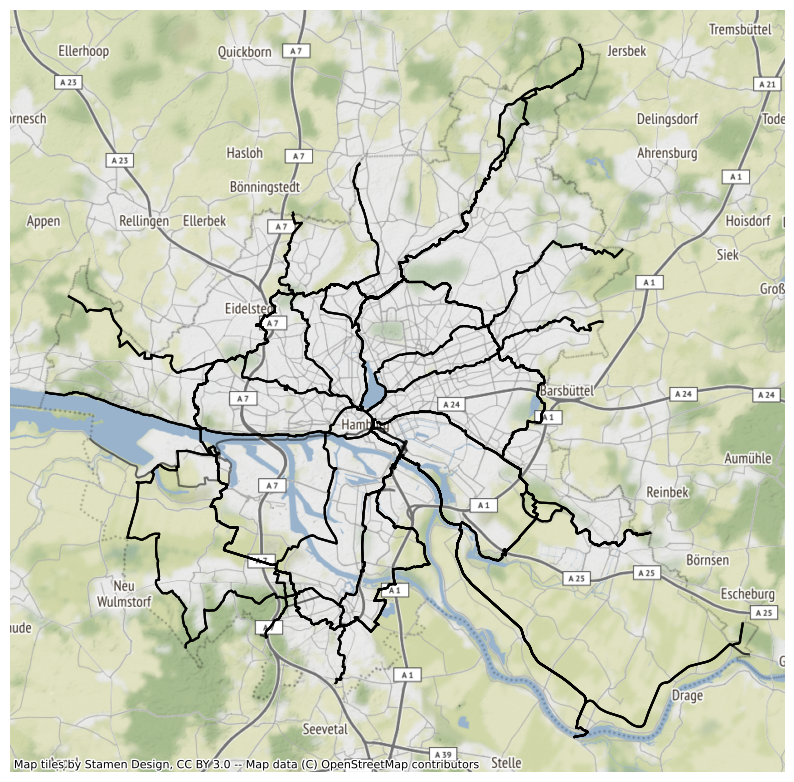

In [38]:
import contextily as cx

hamburg_gdf_wm = hamburg.to_crs(epsg=3857)
ax = hamburg_gdf_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)
ax.set_axis_off()

### Create nice plot of the muenchen dataset

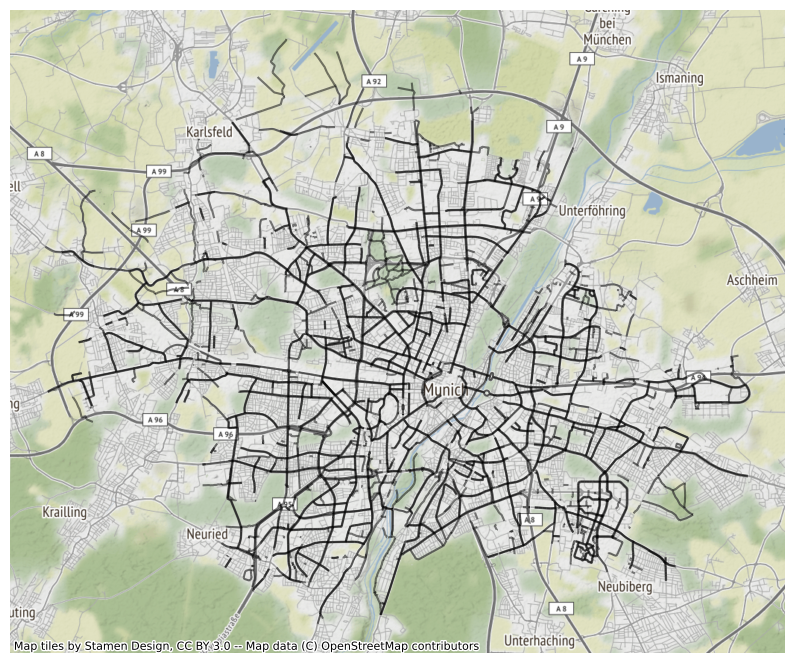

In [39]:
import contextily as cx

muenchen_gdf_wm = muenchen.to_crs(epsg=3857)
ax = muenchen_gdf_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)
ax.set_axis_off()

### Data exploration
Print some basic information about the tirol dataset.

In [40]:
tirol.info()

tirol['altitude'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30656 entries, 0 to 30655
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   latitude   30656 non-null  float64       
 1   longitude  30656 non-null  float64       
 2   altitude   30068 non-null  float64       
 3   name       30656 non-null  object        
 4   time       2790 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.2+ MB


array([588.768125, 580.      , 598.418521, ..., 812.      , 817.7     ,
       822.      ])